In [4]:
from main import *

In [2]:
# load data
data = list(load_data(compression=''))

Output()

Output()

Layer (type:depth-idx)                             Output Shape              Param #
Model                                              [1, 7]                    --
├─ConvNeXt: 1-1                                    [1, 1024]                 --
│    └─Sequential: 2-1                             [1, 1024, 7, 7]           --
│    │    └─Conv2dNormActivation: 3-1              [1, 128, 56, 56]          6,528
│    │    └─Sequential: 3-2                        [1, 128, 56, 56]          415,488
│    │    └─Sequential: 3-3                        [1, 256, 28, 28]          131,584
│    │    └─Sequential: 3-4                        [1, 256, 28, 28]          1,617,408
│    │    └─Sequential: 3-5                        [1, 512, 14, 14]          525,312
│    │    └─Sequential: 3-6                        [1, 512, 14, 14]          57,424,896
│    │    └─Sequential: 3-7                        [1, 1024, 7, 7]           2,099,200
│    │    └─Sequential: 3-8                        [1, 1024, 7, 7]         

epoch,train_loss,valid_loss,accuracy,time
0,1.899463,1.836837,0.314667,00:13
1,1.831891,1.724162,0.330667,00:14
2,1.770473,1.670537,0.374667,00:14
3,1.719314,1.610565,0.400000,00:14
4,1.668433,1.551160,0.426667,00:15
5,1.619287,1.499976,0.466667,00:18
6,1.569277,1.428716,0.489333,00:20
7,1.515641,1.395705,0.484000,00:20
8,1.474381,1.361900,0.513333,00:29
9,1.439487,1.368574,0.504000,00:34


Better model found at epoch 0 with valid_loss value: 1.8368369340896606.


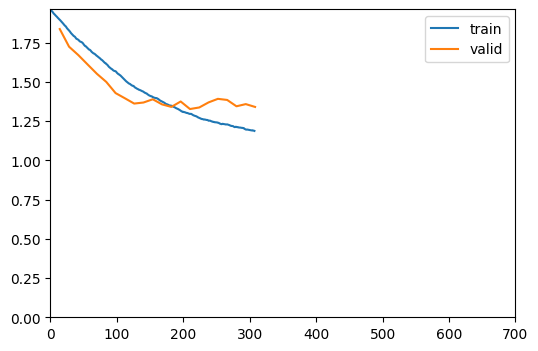

Better model found at epoch 1 with valid_loss value: 1.7241616249084473.
Better model found at epoch 2 with valid_loss value: 1.670536756515503.
Better model found at epoch 3 with valid_loss value: 1.610565423965454.
Better model found at epoch 4 with valid_loss value: 1.551160454750061.
Better model found at epoch 5 with valid_loss value: 1.4999759197235107.
Better model found at epoch 6 with valid_loss value: 1.4287161827087402.
Better model found at epoch 7 with valid_loss value: 1.395705223083496.
Better model found at epoch 8 with valid_loss value: 1.361899733543396.
Better model found at epoch 11 with valid_loss value: 1.3566020727157593.
Better model found at epoch 12 with valid_loss value: 1.3406126499176025.
Better model found at epoch 14 with valid_loss value: 1.32709801197052.
No improvement since epoch 14: early stopping


In [6]:
from main import *
learner = main(params, data, verbose=1)